In [16]:
import pvtools.pv_curve as pvc
import pandas as pd
import matplotlib.pyplot as plt

## 1. Load in data

In [34]:
data_ids = ['qudo_1', 'qudo_2', 'quag_4', 'quag_5']

pv_curves = []
for data_id in data_ids:
    data = pd.read_excel(f'./data/{data_id}/{data_id}.xlsx')
    dry_mass = data['Dry Weight (g)'].iloc[0]
    data = data[['Y (Mpa)', 'Mass (g)']].dropna()
    lwps = data['Y (Mpa)']
    masses = data['Mass (g)']
    pv_curve = pvc.PVCurve(lwps, masses, dry_mass)
    pv_curves.append(pv_curve)

c:\Users\jeant\miniconda3\envs\ghost\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
INFO:root:Breakpoint found at index 13 with R² of 0.977
c:\Users\jeant\miniconda3\envs\ghost\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
INFO:root:Breakpoint found at index 9 with R² of 0.987
c:\Users\jeant\miniconda3\envs\ghost\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
INFO:root:Breakpoint found at index 11 with R² of 0.968
c:\Users\jeant\miniconda3\envs\ghost\Lib\site-packages\statsmodels\regression\linear_model.py:1716: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid
I

## 2. Make plot

In [96]:
round((this_curve.tlp_conf_int[1] - this_curve.tlp).values[0],2)

0.08

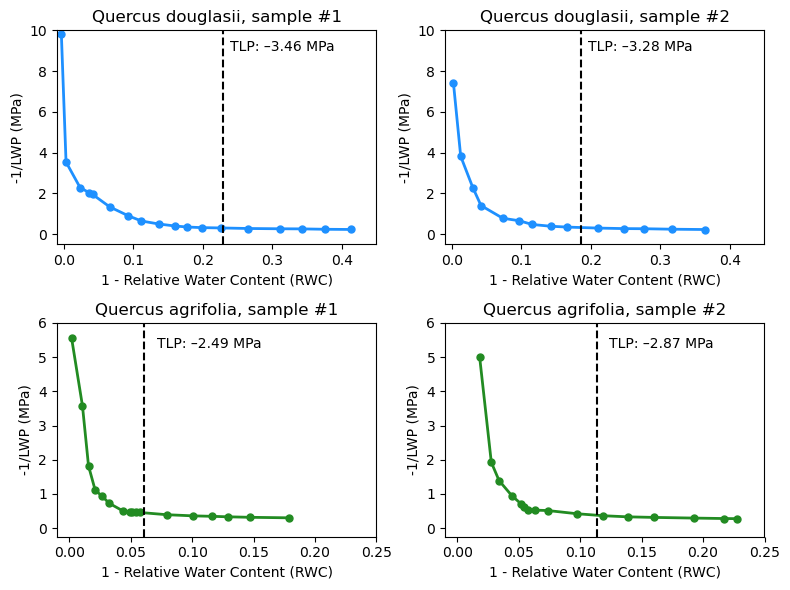

In [ ]:
color_dict = {
    'qudo_1': 'dodgerblue',
    'qudo_2': 'dodgerblue',
    'quag_4': 'forestgreen',
    'quag_5': 'forestgreen'
}
fig, axs = plt.subplots(2,2, figsize=(8, 6))
axs = axs.flatten()
for i, this_curve in enumerate(pv_curves):
    neg_inv_psis = -1* this_curve.inverse_psis
    axs[i].plot(1-this_curve.rwc, neg_inv_psis, label='PV Curve', color=color_dict[data_ids[i]], linewidth=2, marker='o', markersize=5)
        
    axs[i].set_xlabel('1 - Relative Water Content (RWC)')
    axs[i].set_ylabel('-1/LWP (MPa)')

    axs[i].axvline(x=1-this_curve.rwc_tlp, color='black', linestyle='--', label='TLP')
    
    if i ==0 or i == 1:
        axs[i].text(1-this_curve.rwc_tlp + 0.01, 9, f'TLP: –{this_curve.tlp:.2f} MPa', color='black', fontsize=10)

    if i == 2 or i == 3:
        axs[i].text(1-this_curve.rwc_tlp + 0.01, 5.25, f'TLP: –{this_curve.tlp:.2f} MPa', color='black', fontsize=10)

axs[0].set_title('Quercus douglasii, sample #1')
axs[1].set_title('Quercus douglasii, sample #2')
axs[2].set_title('Quercus agrifolia, sample #1')
axs[3].set_title('Quercus agrifolia, sample #2')

axs[0].set_ylim(-0.5, 10)
axs[1].set_ylim(-0.5, 10)
axs[2].set_ylim(-0.25, 6)
axs[3].set_ylim(-0.25, 6)

axs[0].set_xlim(-0.01, 0.45)
axs[1].set_xlim(-0.01, 0.45)
axs[2].set_xlim(-0.01, 0.25)
axs[3].set_xlim(-0.01, 0.25)




plt.tight_layout()
# plt.savefig('./s5_TLPcurves.png', dpi=300, bbox_inches='tight')
plt.show()